<a href="https://colab.research.google.com/github/OjashShakya/Ojash_Shakya_2408654_AI_Workshops/blob/main/Ojash_Shakya_2408654_Workshop_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ojash Shakya

ID: 2408654

##Building Simple Linear Regression from Scratch.

Implementation from Scratch Step - by - Step Guide:

Step -1- Data Understanding, Analysis and Preparations:

In this step we will read the data, understand the data, perform some basic data cleaning, and store everything in the matrix as shown below.

• Requirements:

  Dataset → student.csv

• Decision Process:

  In this step we will define the objective of the task.

  – Objective of the Task -

  To Predict the marks obtained in writing based on the marks of Math and Reading.

• To - Do - 1:
1. Read and Observe the Dataset.
2. Print top(5) and bottom(5) of the dataset {Hint: pd.head and pd.tail}.
3. Print the Information of Datasets. {Hint: pd.info}.
4. Gather the Descriptive info about the Dataset. {Hint: pd.describe}
5. Split your data into Feature (X) and Label (Y).

• To - Do - 2:
1. To make the task easier - let’s assume there is no bias or intercept.
2. Create the following matrices:

  Y = W^T X

3. Note: The feature matrix described above does not include a column of 1s, as it assumes the
absence of a bias term in the model.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_and_prepare_data(file_path):
    """
    Load the dataset and prepare features (X) and target (Y).

    Parameters:
        file_path (str): Path to the dataset CSV file.

    Returns:
        X_train, X_test, Y_train, Y_test: Split datasets for training and testing.
    """
    data = pd.read_csv(file_path)
    print("Top 5 rows of the dataset:")
    print(data.head())
    print("Bottom 5 rows of the dataset:")
    print(data.tail())
    print("\nDataset Information:")
    print(data.info())
    print("\nDescriptive Statistics:")
    print(data.describe())

    X = data[["Math", "Reading"]].values  # Features: Math and Reading marks
    Y = data["Writing"].values  # Target: Writing marks

    # Split the dataset manually (80% train, 20% test)
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    Y_train, Y_test = Y[:split_idx], Y[split_idx:]

    return X_train, X_test, Y_train, Y_test

Step -2- Build a Cost Function:
Cost function is the average of loss function measured across the data point. As the cost function for Regression
problem we will be using Mean Square Error which is given by:

Feel free to build your own code or complete the following code:

In [23]:
def cost_function(X, Y, W):
    """
    Calculate the Mean Squared Error (MSE).

    Parameters:
        X (numpy.ndarray): Feature matrix.
        Y (numpy.ndarray): Target vector.
        W (numpy.ndarray): Weight vector.

    Returns:
        cost (float): Mean Squared Error.
    """
    m = len(Y)
    Y_pred = np.dot(X, W)
    cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)
    return cost

Step -3- Gradient Descent for Simple Linear Regression:

In [24]:
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Perform gradient descent to optimize weights.

    Parameters:
        X (numpy.ndarray): Feature matrix.
        Y (numpy.ndarray): Target vector.
        W (numpy.ndarray): Initial weights.
        alpha (float): Learning rate.
        iterations (int): Number of iterations.

    Returns:
        W (numpy.ndarray): Optimized weights.
        cost_history (list): Cost values over iterations.
    """
    m = len(Y)
    cost_history = []

    for i in range(iterations):
        Y_pred = np.dot(X, W)
        loss = Y_pred - Y
        gradient = (1 / m) * np.dot(X.T, loss)
        W -= alpha * gradient
        cost = cost_function(X, Y, W)
        cost_history.append(cost)

    return W, cost_history

Step -4- Evaluate the Model:

In [25]:
def rmse(Y, Y_pred):
    """
    Calculate Root Mean Squared Error (RMSE).

    Parameters:
        Y (numpy.ndarray): Actual target values.
        Y_pred (numpy.ndarray): Predicted target values.

    Returns:
        rmse (float): Root Mean Squared Error.
    """
    return np.sqrt(np.mean((Y - Y_pred) ** 2))

def r2(Y, Y_pred):
    """
    Calculate R-squared value.

    Parameters:
        Y (numpy.ndarray): Actual target values.
        Y_pred (numpy.ndarray): Predicted target values.

    Returns:
        r2 (float): R-squared value.
    """
    ss_total = np.sum((Y - np.mean(Y)) ** 2)
    ss_residual = np.sum((Y - Y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

Step -5- Main Function to Integrate All Steps:
In this section, we will create a main function that integrates the data loading, preprocessing, cost function,
gradient descent, and model evaluation. This will help in running the entire workflow with minimal effort.

• Objective:

The objective of the main function is to execute the full process, from loading the data to performing
linear regression using gradient descent and evaluating the results using metrics like RMSE and R2.

• To - Do:

We will define a function that:

1. Loads the data and splits it into training and test sets.
2. Prepares the feature matrix (X) and target vector (Y).
3. Defines the weight matrix (W) and initializes the learning rate and number of iterations.
4. Calls the gradient descent function to learn the parameters.
5. Evaluates the model using RMSE and R2.

Re-write the following code or Write your own:

Top 5 rows of the dataset:
   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62
Bottom 5 rows of the dataset:
     Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None

Descriptive Statistics:
              Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.000000

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-23-242051ccf788>:15: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)
<ipython-input-24-7a7e71b4220e>:23: RuntimeWarning: invalid value encountered in subtract
  W -= alpha * gradient


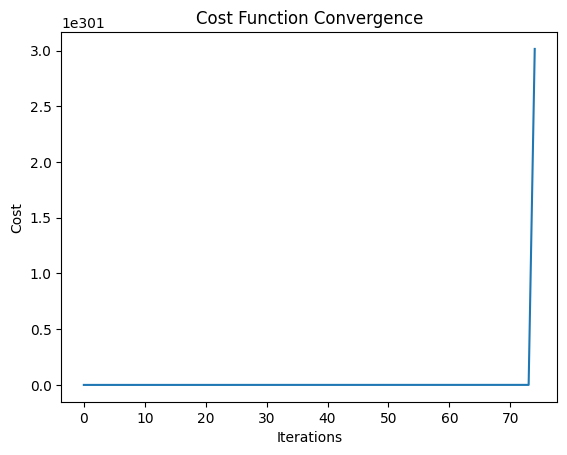

In [26]:
def main():
    """
    Main function to perform linear regression from data loading to evaluation.
    """
    # File path to the dataset
    file_path = "/content/drive/MyDrive/Concepts and Technologies of AI/Datasets/Datasets/student.csv"

    # Step 1: Load and prepare data
    X_train, X_test, Y_train, Y_test = load_and_prepare_data(file_path)

    # Add a bias column to the feature matrix (intercept term)
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    # Step 2: Initialize weights and hyperparameters
    W = np.zeros(X_train.shape[1])
    alpha = 0.01
    iterations = 1000

    # Step 3: Perform gradient descent
    W_optimized, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

    # Step 4: Make predictions and evaluate the model
    Y_pred_train = np.dot(X_train, W_optimized)
    Y_pred_test = np.dot(X_test, W_optimized)

    train_rmse = rmse(Y_train, Y_pred_train)
    test_rmse = rmse(Y_test, Y_pred_test)

    train_r2 = r2(Y_train, Y_pred_train)
    test_r2 = r2(Y_test, Y_pred_test)

    # Step 5: Output results
    print("Optimized Weights:", W_optimized)
    print("Final Training RMSE:", train_rmse)
    print("Final Test RMSE:", test_rmse)
    print("Final Training R2:", train_r2)
    print("Final Test R2:", test_r2)

    # Plot cost history
    plt.plot(range(iterations), cost_history)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost Function Convergence")
    plt.show()

if __name__ == "__main__":
    main()